In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

In [3]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras.models import load_model
from keras import backend as K

In [4]:
import tensorflow as tf

In [5]:
keras.__version__ , tf.__version__

('2.4.3', '2.4.1')

In [6]:
tf.test.gpu_device_name()

!nvidia-smi

Tue Mar 23 06:18:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    70W / 149W |    124MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/'

total 1741130
-rw------- 1 root root      20066 Mar  4 04:45 cat.1700.jpg
-rw------- 1 root root   68787205 Mar  9 04:06 creditCardFraud.zip
-rw------- 1 root root   90618980 Mar  4 04:51 dogs_and_cats_small.zip
drwx------ 2 root root       4096 Mar  9 04:27 image
-rw------- 1 root root    8204887 Mar  4 04:45 Images_500.zip
-rw------- 1 root root    4240457 Mar 15 04:25 Kaggle_Customer_Satisfaction.zip
-rw------- 1 root root   12929865 Mar  4 04:42 Logo_Data.zip
-rw------- 1 root root   18272469 Mar  4 04:50 MNIST.csv
-rw------- 1 root root   23715344 Mar  7 07:08 Online_Retail.xlsx
-rw------- 1 root root        741 Mar  4 04:44 PII.csv
-rw------- 1 root root 1141460846 Mar  4 04:50 waferImages.zip
-rw------- 1 root root  414658234 Mar  4 04:49 yolo_weight.zip


In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Logo_Data.zip

In [11]:
!ls -l

total 16
drwx------  5 root root 4096 Mar 23 06:19 drive
drwxr-xr-x  1 root root 4096 Mar 18 13:36 sample_data
drwxr-xr-x 29 root root 4096 Mar 23 06:19 test
drwxr-xr-x 29 root root 4096 Mar 23 06:19 train


In [14]:
train_dir = 'train'
valid_dir = 'test'
test_dir = 'test'

In [24]:
train_generator = ImageDataGenerator(rescale = 1./255,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                     fill_mode = 'nearest')

train_set = train_generator.flow_from_directory(
    train_dir,
    target_size = (75, 75),
    batch_size = 20,
    class_mode = 'categorical'
)

valid_generator = ImageDataGenerator(rescale = 1./255)

valid_set = valid_generator.flow_from_directory(
    valid_dir,
    target_size = (75, 75),
    batch_size = 20,
    class_mode = 'categorical'
)

Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.


## 1. Model Define

In [25]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                        input_shape = (75, 75, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(27, activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

## 2. Model Compile

In [27]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

## 3. Model Fit

In [28]:
Hist_logo = model.fit(train_set,
                      steps_per_epoch = 25,
                      validation_data = valid_set,
                      validation_steps = 9,
                      epochs = 100)

Epoch 1/100
25/25 [==============================] - 3s 94ms/step - loss: 3.3373 - accuracy: 0.0282 - val_loss: 3.1211 - val_accuracy: 0.0678
Epoch 2/100
25/25 [==============================] - 2s 76ms/step - loss: 3.0725 - accuracy: 0.0526 - val_loss: 2.8463 - val_accuracy: 0.1469
Epoch 3/100
25/25 [==============================] - 2s 76ms/step - loss: 2.6673 - accuracy: 0.2195 - val_loss: 2.8043 - val_accuracy: 0.1695
Epoch 4/100
25/25 [==============================] - 2s 75ms/step - loss: 2.5272 - accuracy: 0.2290 - val_loss: 2.6048 - val_accuracy: 0.2203
Epoch 5/100
25/25 [==============================] - 2s 76ms/step - loss: 2.3389 - accuracy: 0.2703 - val_loss: 2.4680 - val_accuracy: 0.3277
Epoch 6/100
25/25 [==============================] - 2s 78ms/step - loss: 2.0432 - accuracy: 0.3900 - val_loss: 2.3886 - val_accuracy: 0.3672
Epoch 7/100
25/25 [==============================] - 2s 77ms/step - loss: 1.8390 - accuracy: 0.4544 - val_loss: 2.6066 - val_accuracy: 0.3277
Epoch 

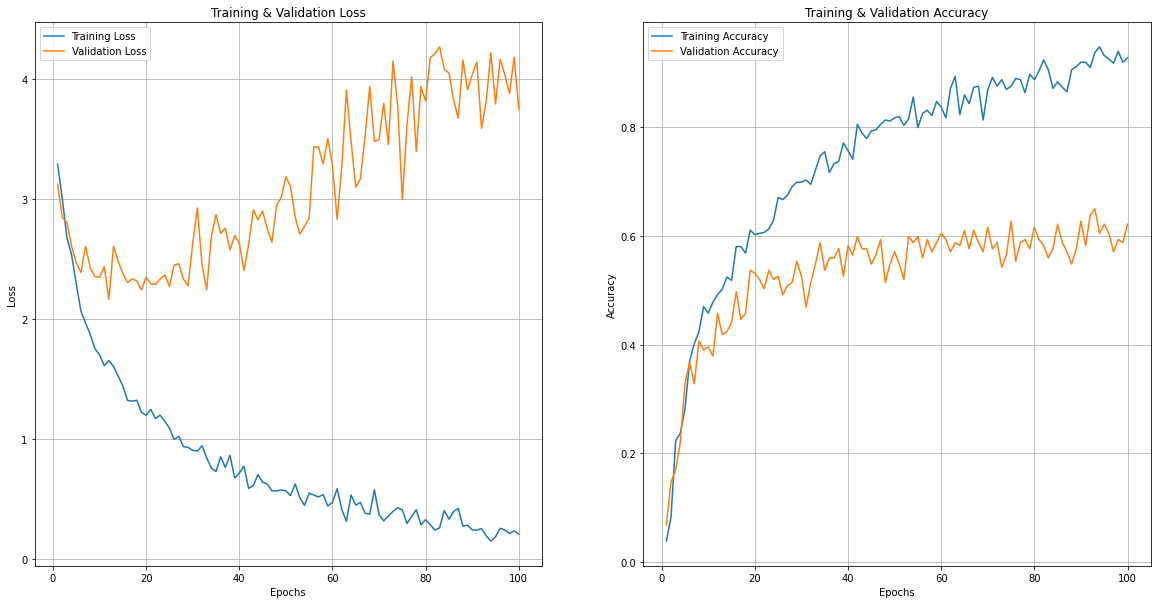

In [29]:
epochs = range(1, len(Hist_logo.history['loss']) + 1)

plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_logo.history['loss'])
plt.plot(epochs, Hist_logo.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_logo.history['accuracy'])
plt.plot(epochs, Hist_logo.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

In [30]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_set = test_generator.flow_from_directory(
    test_dir,
    target_size = (75, 75),
    batch_size = 8,
    class_mode = 'categorical'
)

Found 177 images belonging to 27 classes.


In [31]:
loss, accuracy = model.evaluate(test_set, steps = 9)

print('Loss: {:.5f}' .format(loss))
print('Accuracy: {:.5f}' .format(accuracy))

9/9 [==============================] - 0s 10ms/step - loss: 3.8167 - accuracy: 0.6528
Loss: 3.81670
Accuracy: 0.65278


In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/models/004_logo_classification_with_augmentation.h5')